In [1]:
from pandas import get_dummies
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import keras
import scipy
import numpy
import sys
import csv
import os

C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
# Load data
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Target names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_img.shape, test_img.shape, train_label.shape, test_label.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [6]:
set(train_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

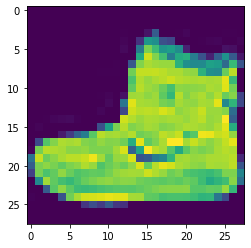

In [9]:
# Using matplotlib to show a sample image
plt.figure()
plt.imshow(train_img[0])

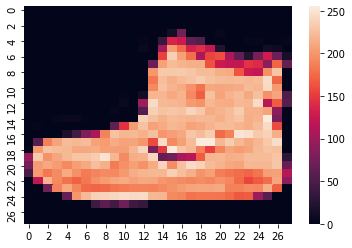

In [10]:
# Using Seaborn to show a sample image
sns.heatmap(train_img[0])

In [11]:
# Normalize image 
train_img = train_img/ 255.
test_img = test_img/ 255.

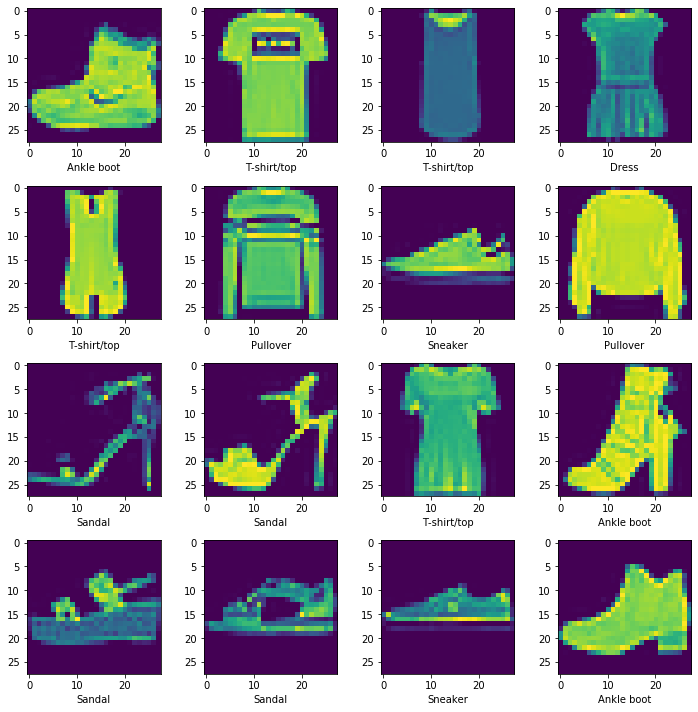

In [12]:
# first 16 items in training data
plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4 , 4, i +1)
    plt.imshow(train_img[i])
    plt.xlabel(class_names[train_label[i]])
plt.tight_layout()

In [13]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

In [14]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
print(train_img.shape)
model.fit(train_img, train_label, epochs = 10, batch_size=100)

(60000, 28, 28)
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2992 - acc: 0.8906
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2873 - acc: 0.8946
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2733 - acc: 0.8997
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2649 - acc: 0.9038
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2556 - acc: 0.9054
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2467 - acc: 0.9096
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2385 - acc: 0.9123
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2316 - acc: 0.9142
Epoch 9/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2246 - acc: 0.9171
Epoch 10/10
60000/60000 [==============================] - 2s 26us

In [18]:
model.evaluate(test_img, test_label)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3332 - acc: 0.8880


[0.3332409679532051, 0.888]

### Make Predictions

In [19]:
predictions = model.predict(test_img)

In [20]:
predictions[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.94],
      dtype=float32)

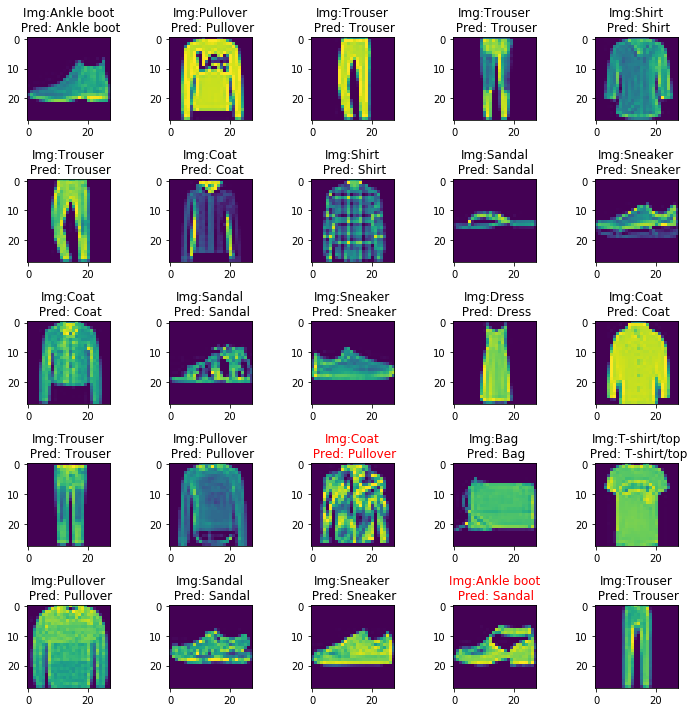

In [22]:
n = 10
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    predictions = model.predict(test_img)
    class_names[np.argmax(predictions[i])]
    plt.imshow(test_img[i])
    
    if class_names[test_label[i]] == class_names[np.argmax(predictions[i])]:
        color = 'k'
    else:
        color = 'r'
        
    plt.title('Img:' + class_names[test_label[i]] + '\n Pred: ' + 
              class_names[np.argmax(predictions[i])], color = color)
plt.tight_layout()